# OPENCLASSROOMS - PARCOURS DATA SCIENTIST

# PROJET 7 - *Implémentez un modèle de scoring*

# 1- Importation des données et des librairies utiles

In [1]:
#Importation des librairies nécssaires pour l'analyse exploratoire

#Visualisation des données
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Manipulation des données
import os
os.chdir('..')
import numpy as np
import pandas as pd

In [2]:
#Mise en place du chemin d'accès aux données et changement de répertoire de travail

files_list = os.listdir('input')
files_list

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [4]:
#Allocation dynamique d'un dataframe pour chaque fichier csv

files = []
for i in files_list:
    tmp = i[:-4]
    files.append(tmp)
    locals()[tmp] = pd.read_csv('input/' + i, encoding = 'iso8859_15')

In [5]:
#Supression des éventuelles colonnes "Unnamed: 0"

for file in files:
    tmp = locals()[file]
    if 'Unnamed: 0' in tmp.columns:
        locals()[file] = tmp.drop(['Unnamed: 0'], axis = 1)

In [8]:
#Affichage de quelques nformations de chaque jeu de données

for file in files:
    tmp = locals()[file]
    print('Nom du fichier : {}'.format(file))
    print("Nombre d'individus dans le jeu de données : {}".format(tmp.shape[0]))
    print("Nombre de colonnes dans le jeu de données : {}".format(tmp.shape[1]))
    print("Nombre de valeurs dupliquées : {}".format(tmp.duplicated().sum()))
    print('\n')

Nom du fichier : application_test
Nombre d'individus dans le jeu de données : 48744
Nombre de colonnes dans le jeu de données : 121
Nombre de valeurs dupliquées : 0


Nom du fichier : application_train
Nombre d'individus dans le jeu de données : 307511
Nombre de colonnes dans le jeu de données : 122
Nombre de valeurs dupliquées : 0


Nom du fichier : bureau
Nombre d'individus dans le jeu de données : 1716428
Nombre de colonnes dans le jeu de données : 17
Nombre de valeurs dupliquées : 0


Nom du fichier : bureau_balance
Nombre d'individus dans le jeu de données : 27299925
Nombre de colonnes dans le jeu de données : 3
Nombre de valeurs dupliquées : 0


Nom du fichier : credit_card_balance
Nombre d'individus dans le jeu de données : 3840312
Nombre de colonnes dans le jeu de données : 23
Nombre de valeurs dupliquées : 0


Nom du fichier : HomeCredit_columns_description
Nombre d'individus dans le jeu de données : 219
Nombre de colonnes dans le jeu de données : 4
Nombre de valeurs dupliquée

application_test
application_train
bureau
bureau_balance
credit_card_balance
HomeCredit_columns_description
installments_payments
POS_CASH_balance
previous_application
sample_submission


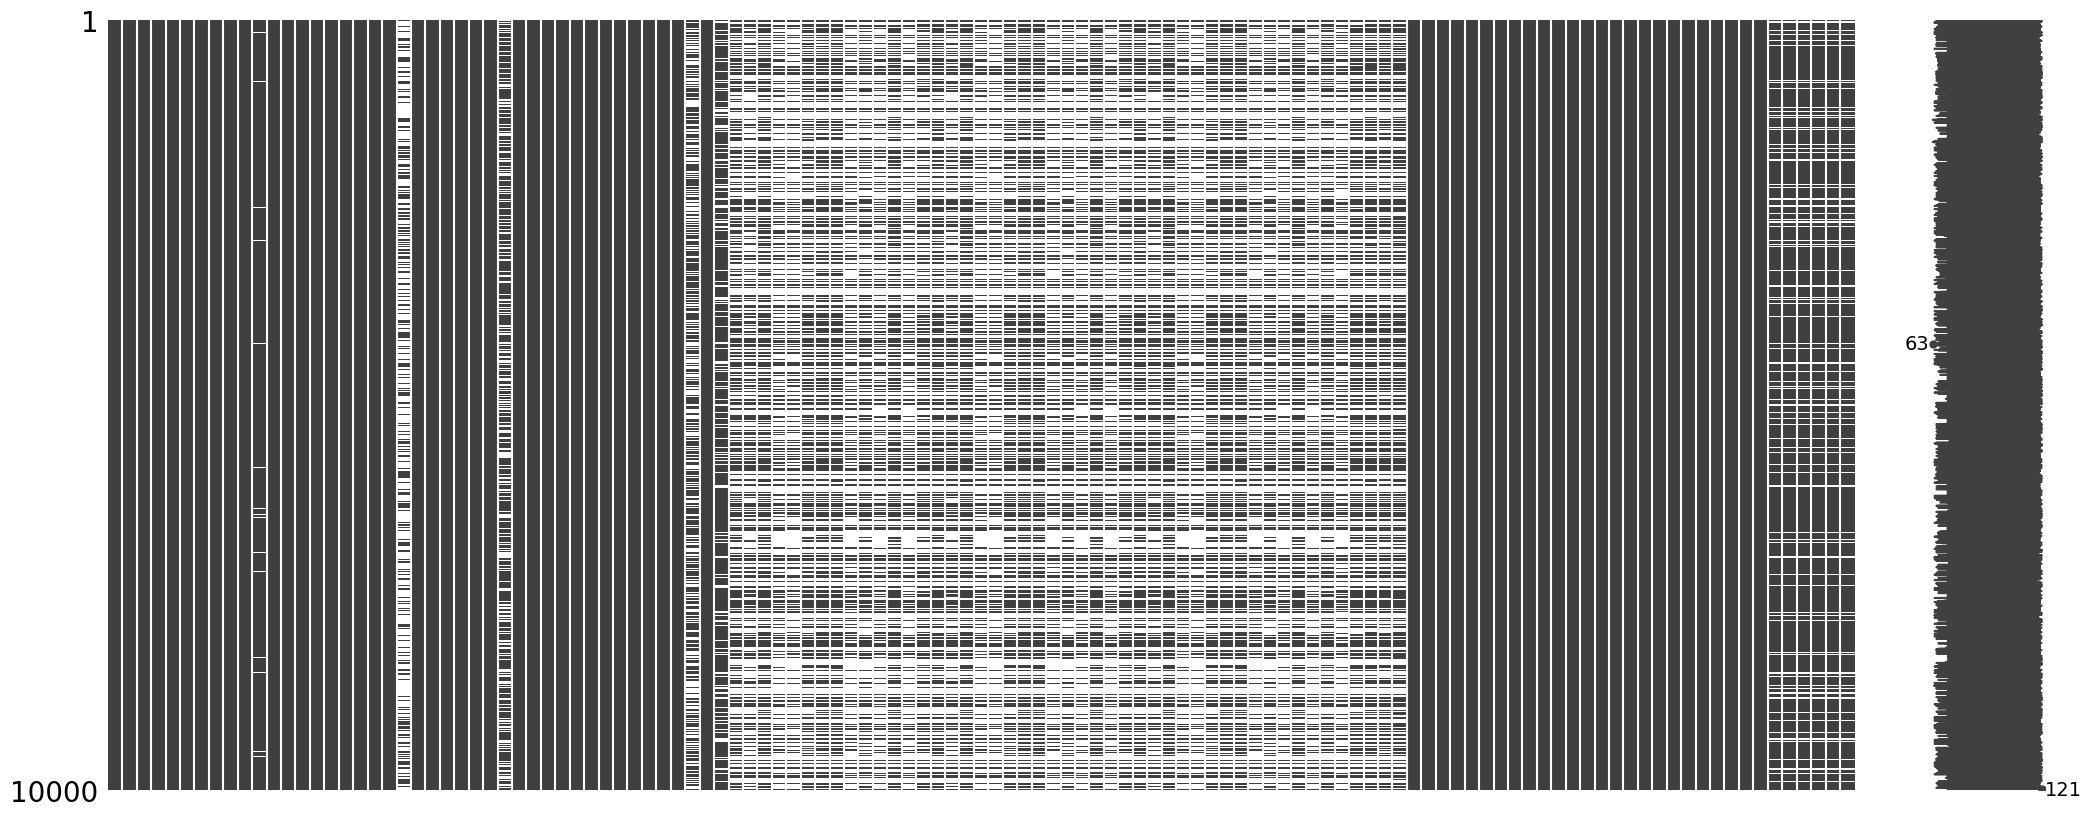

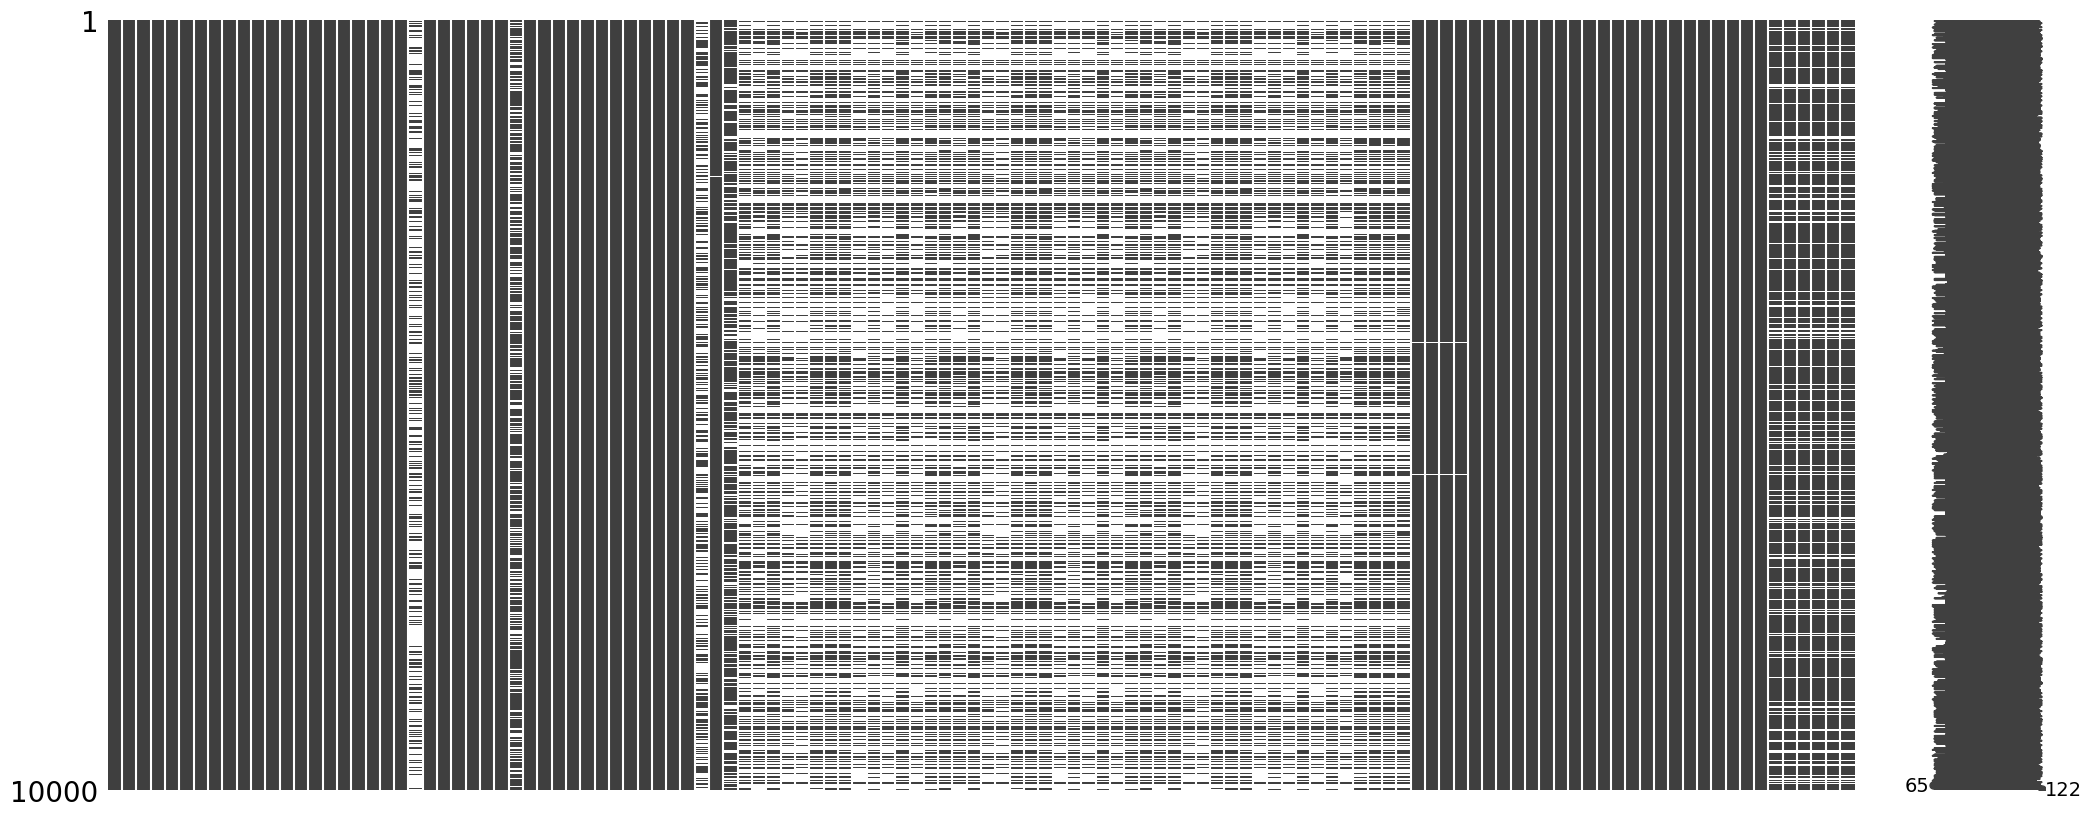

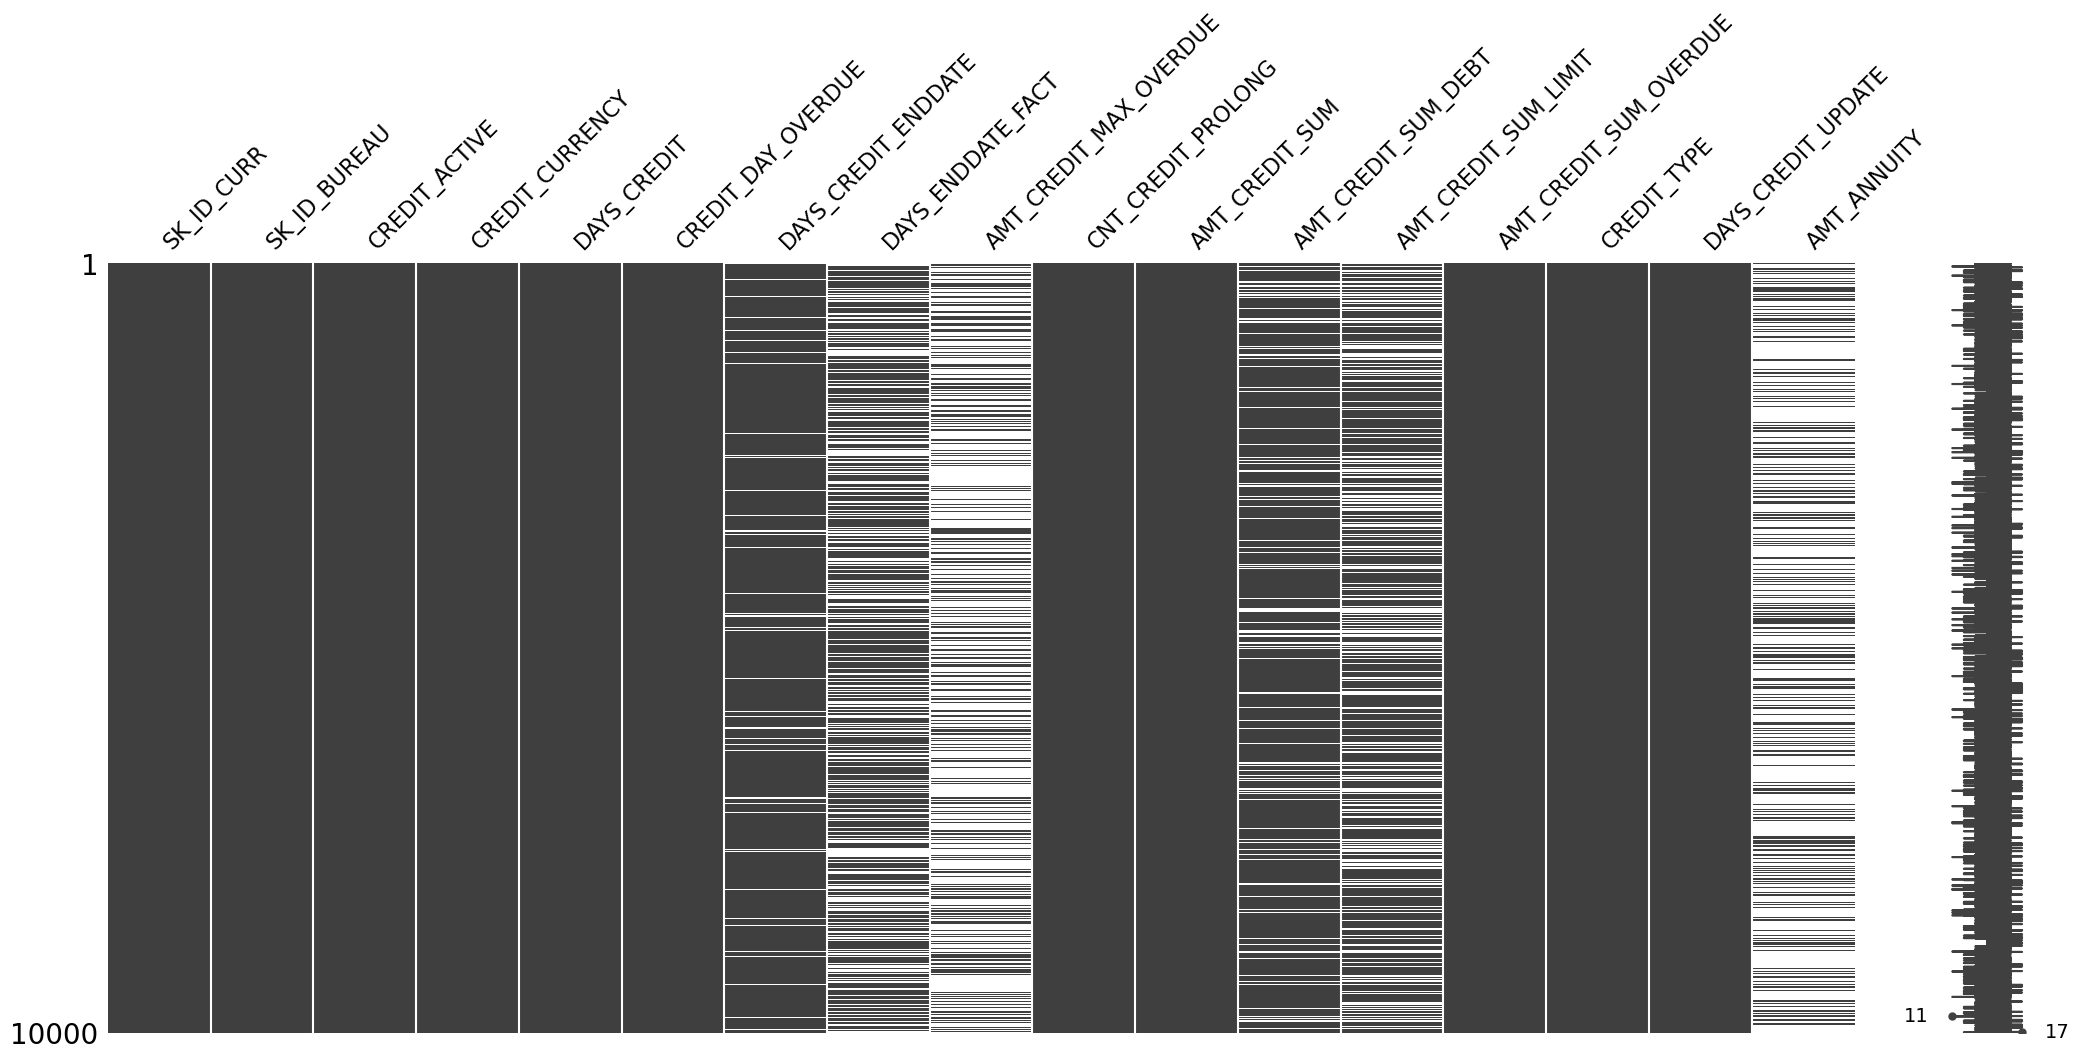

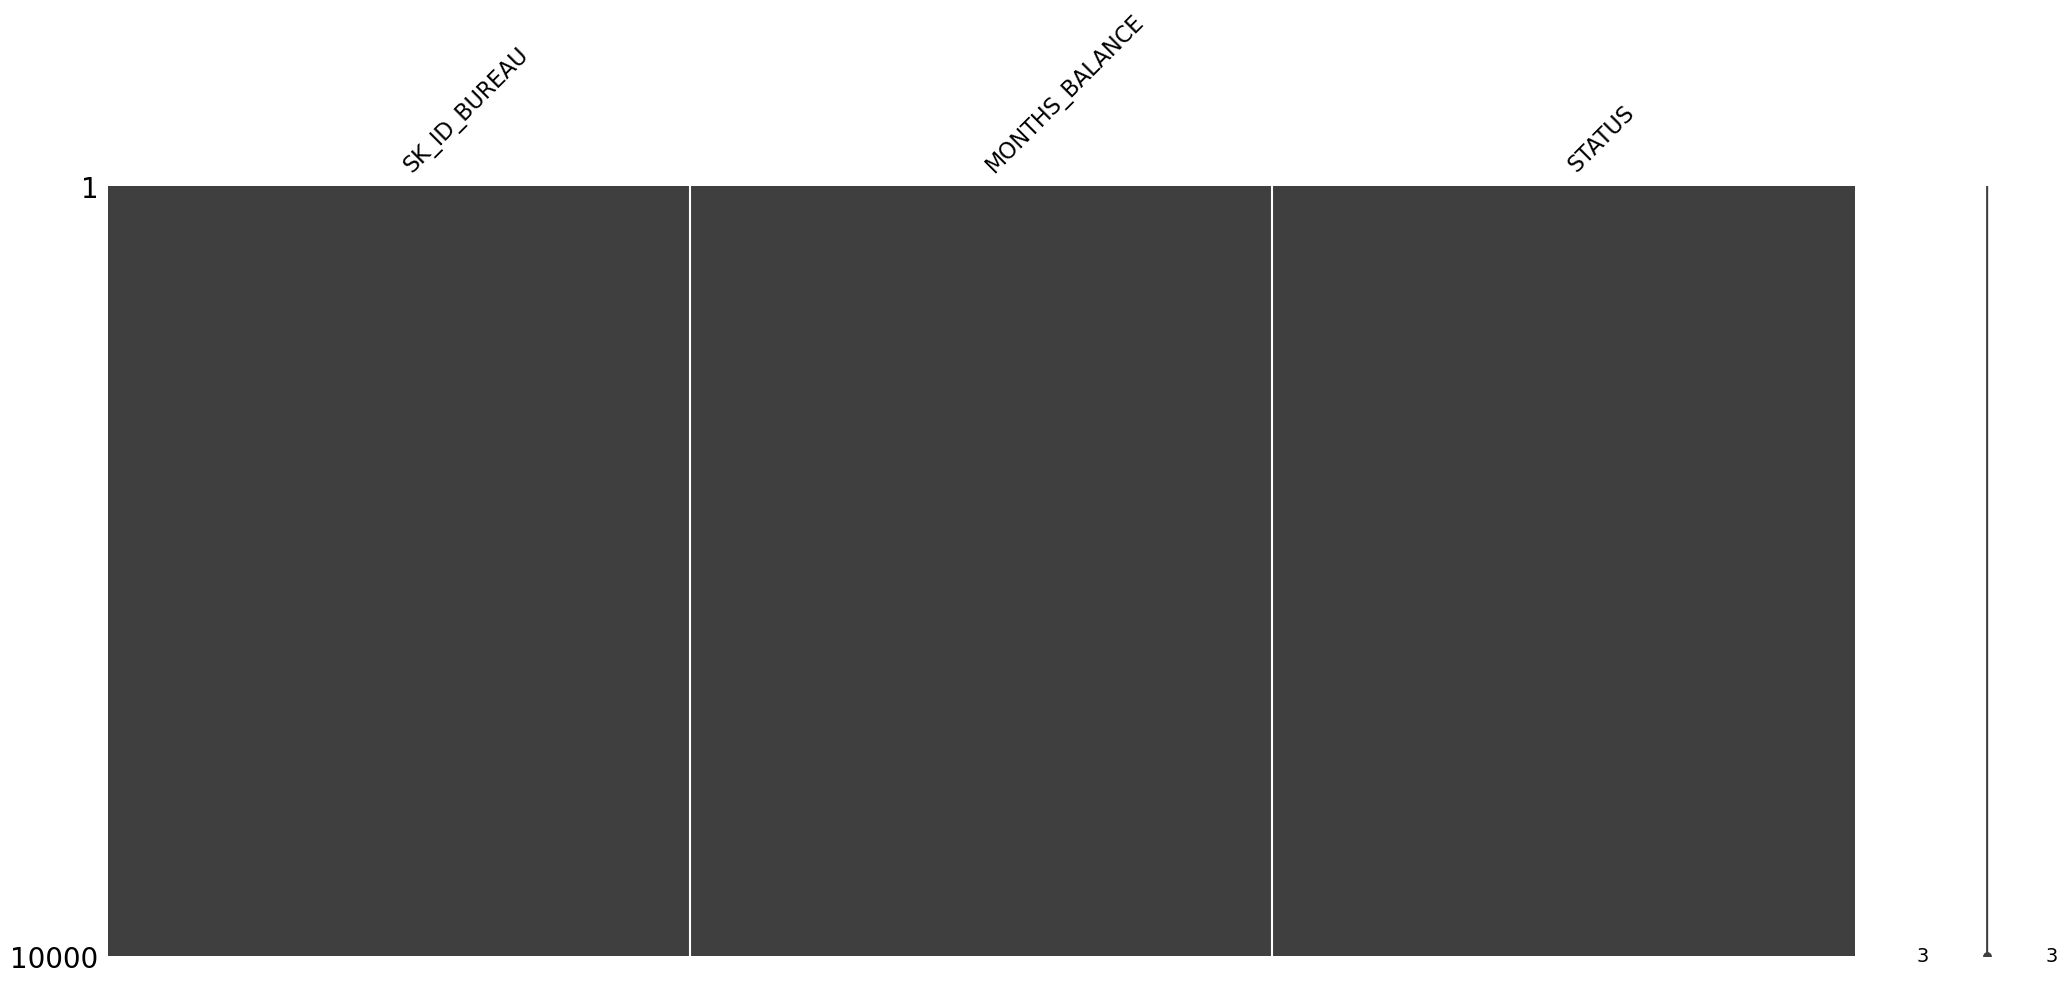

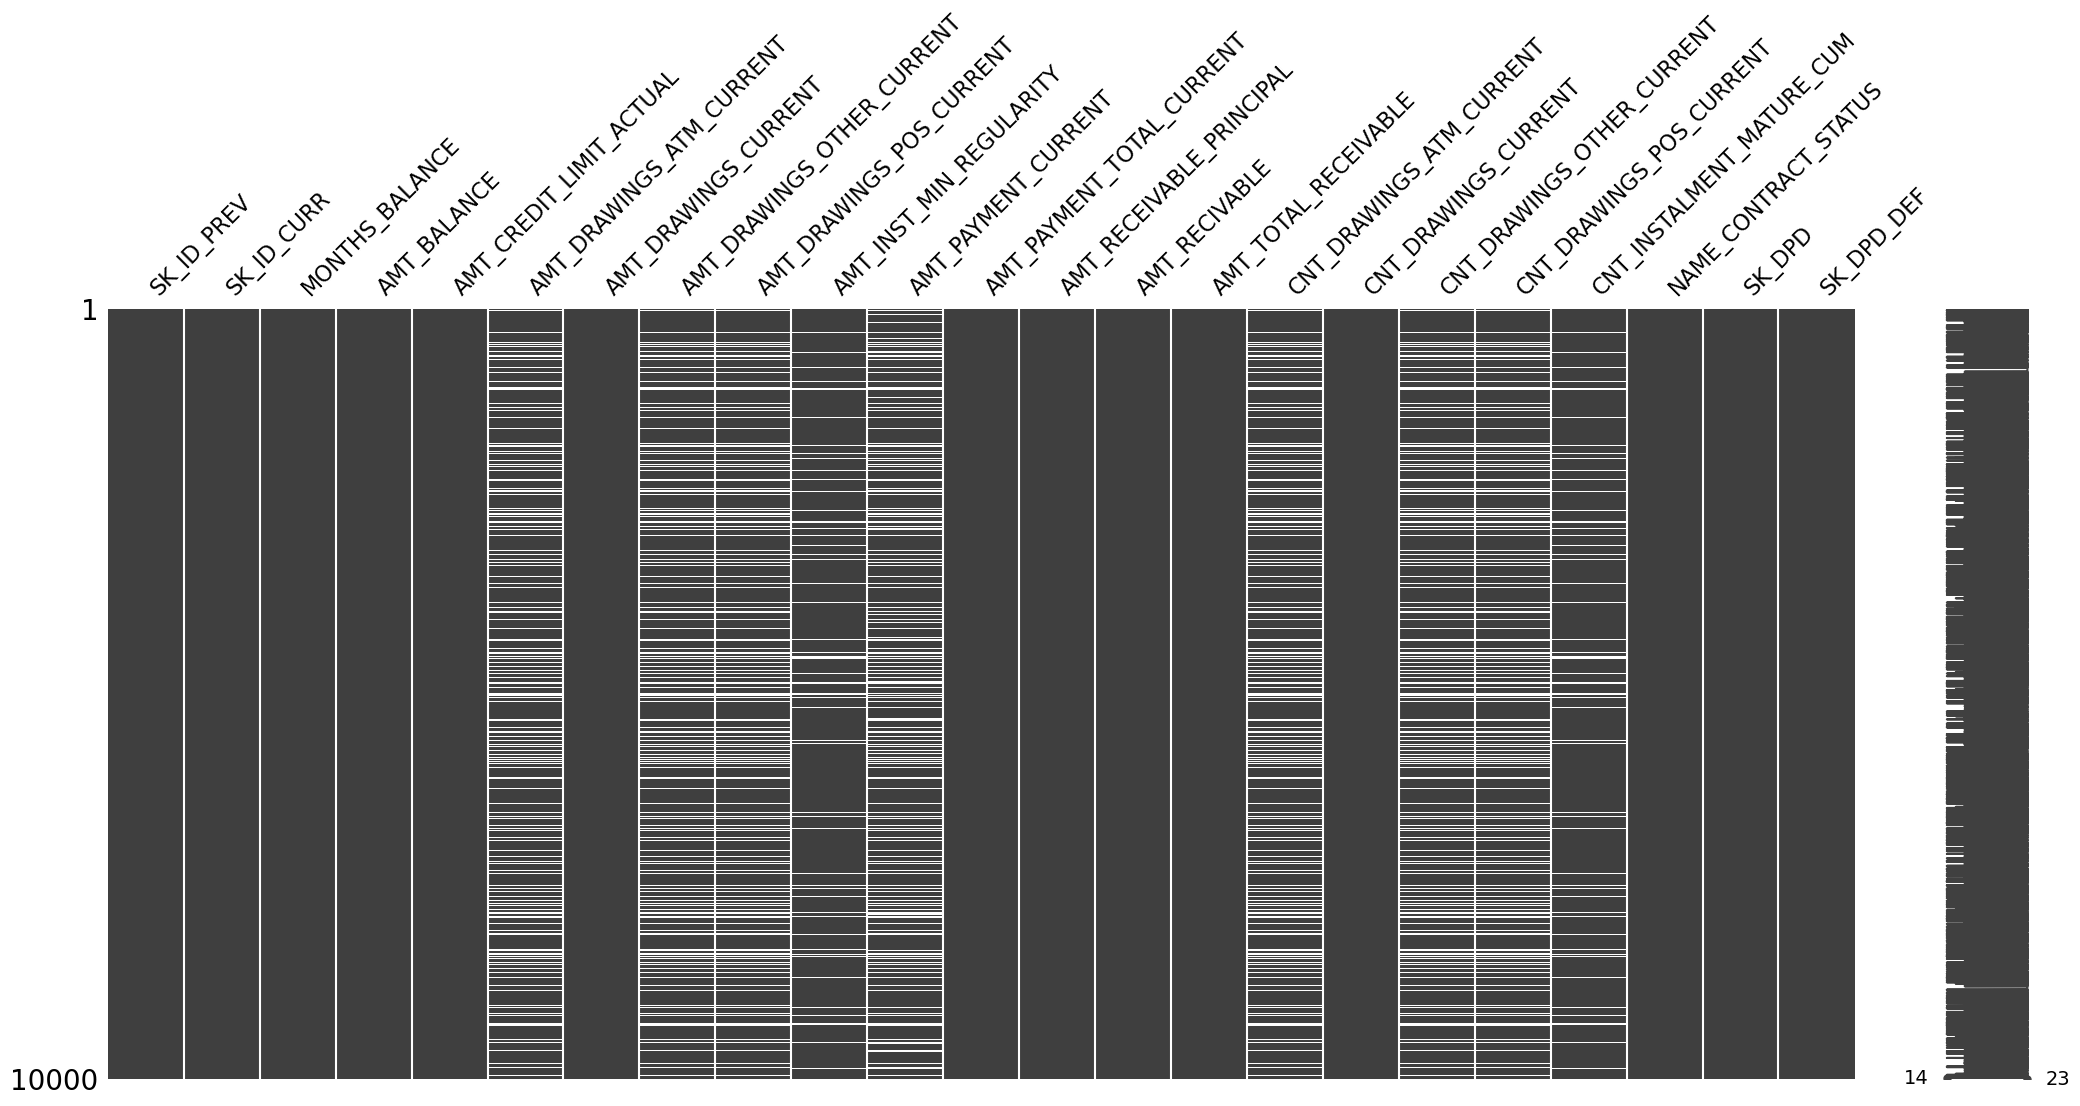

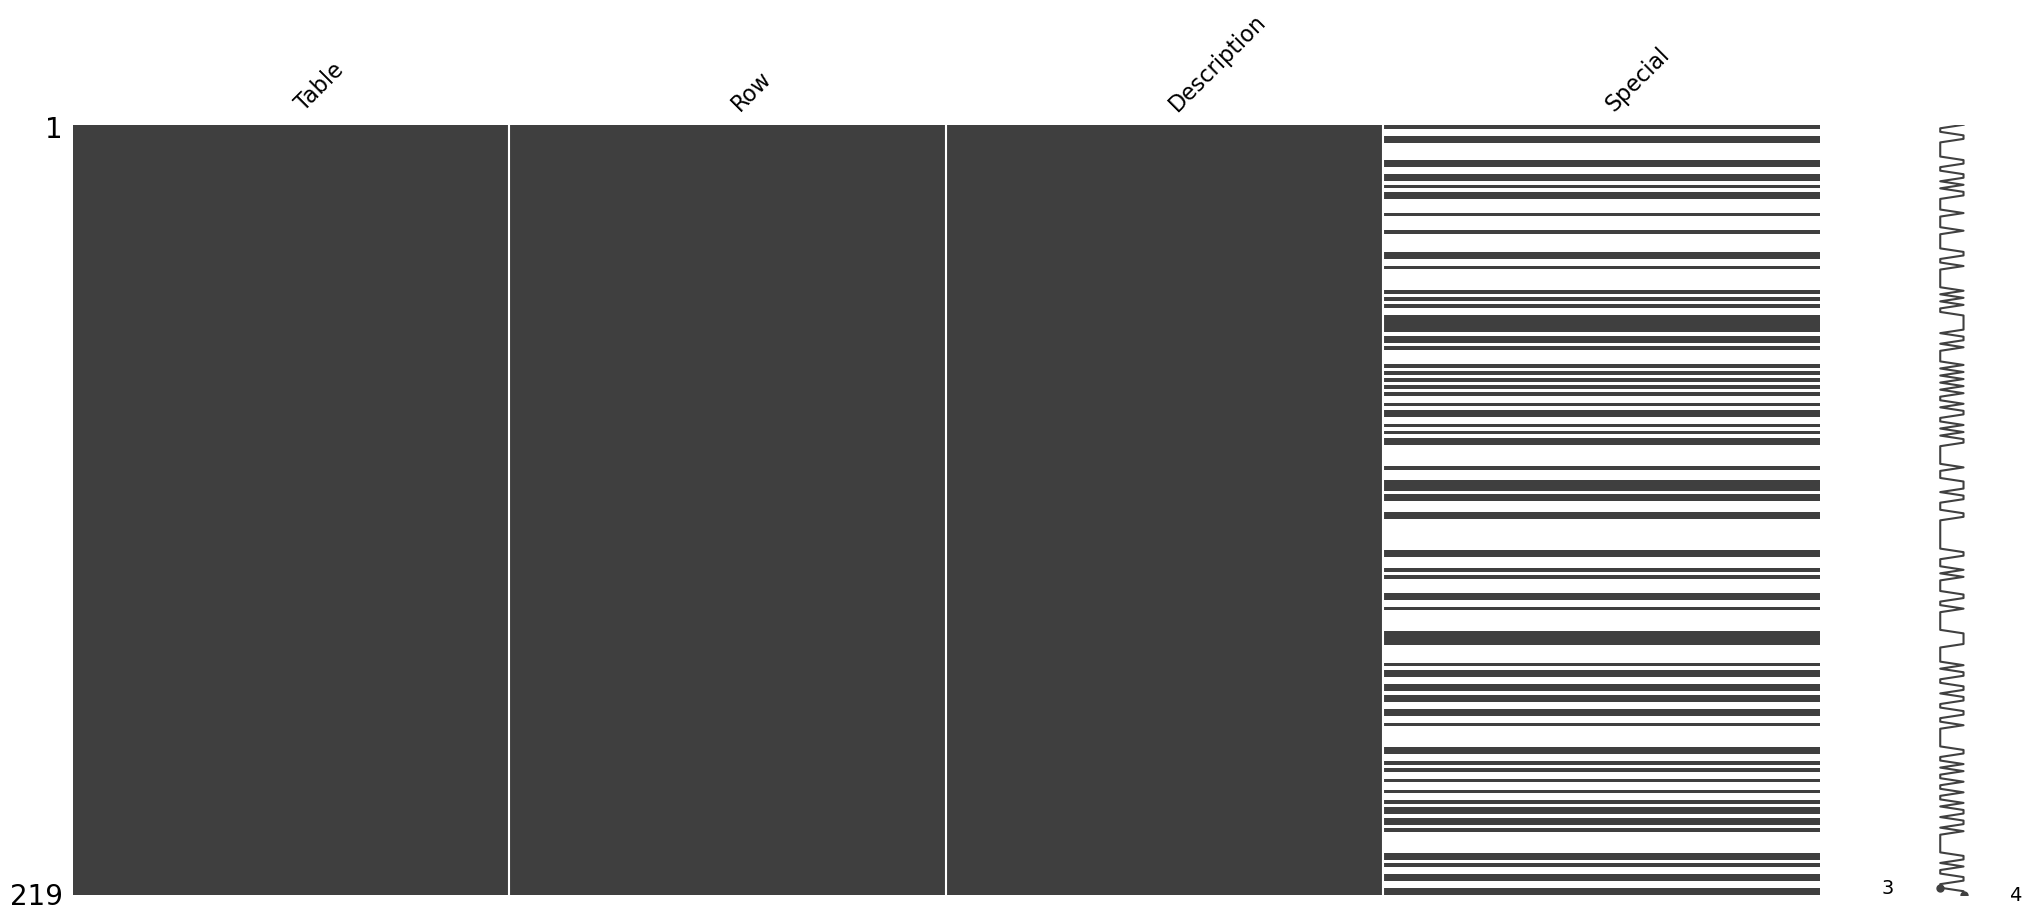

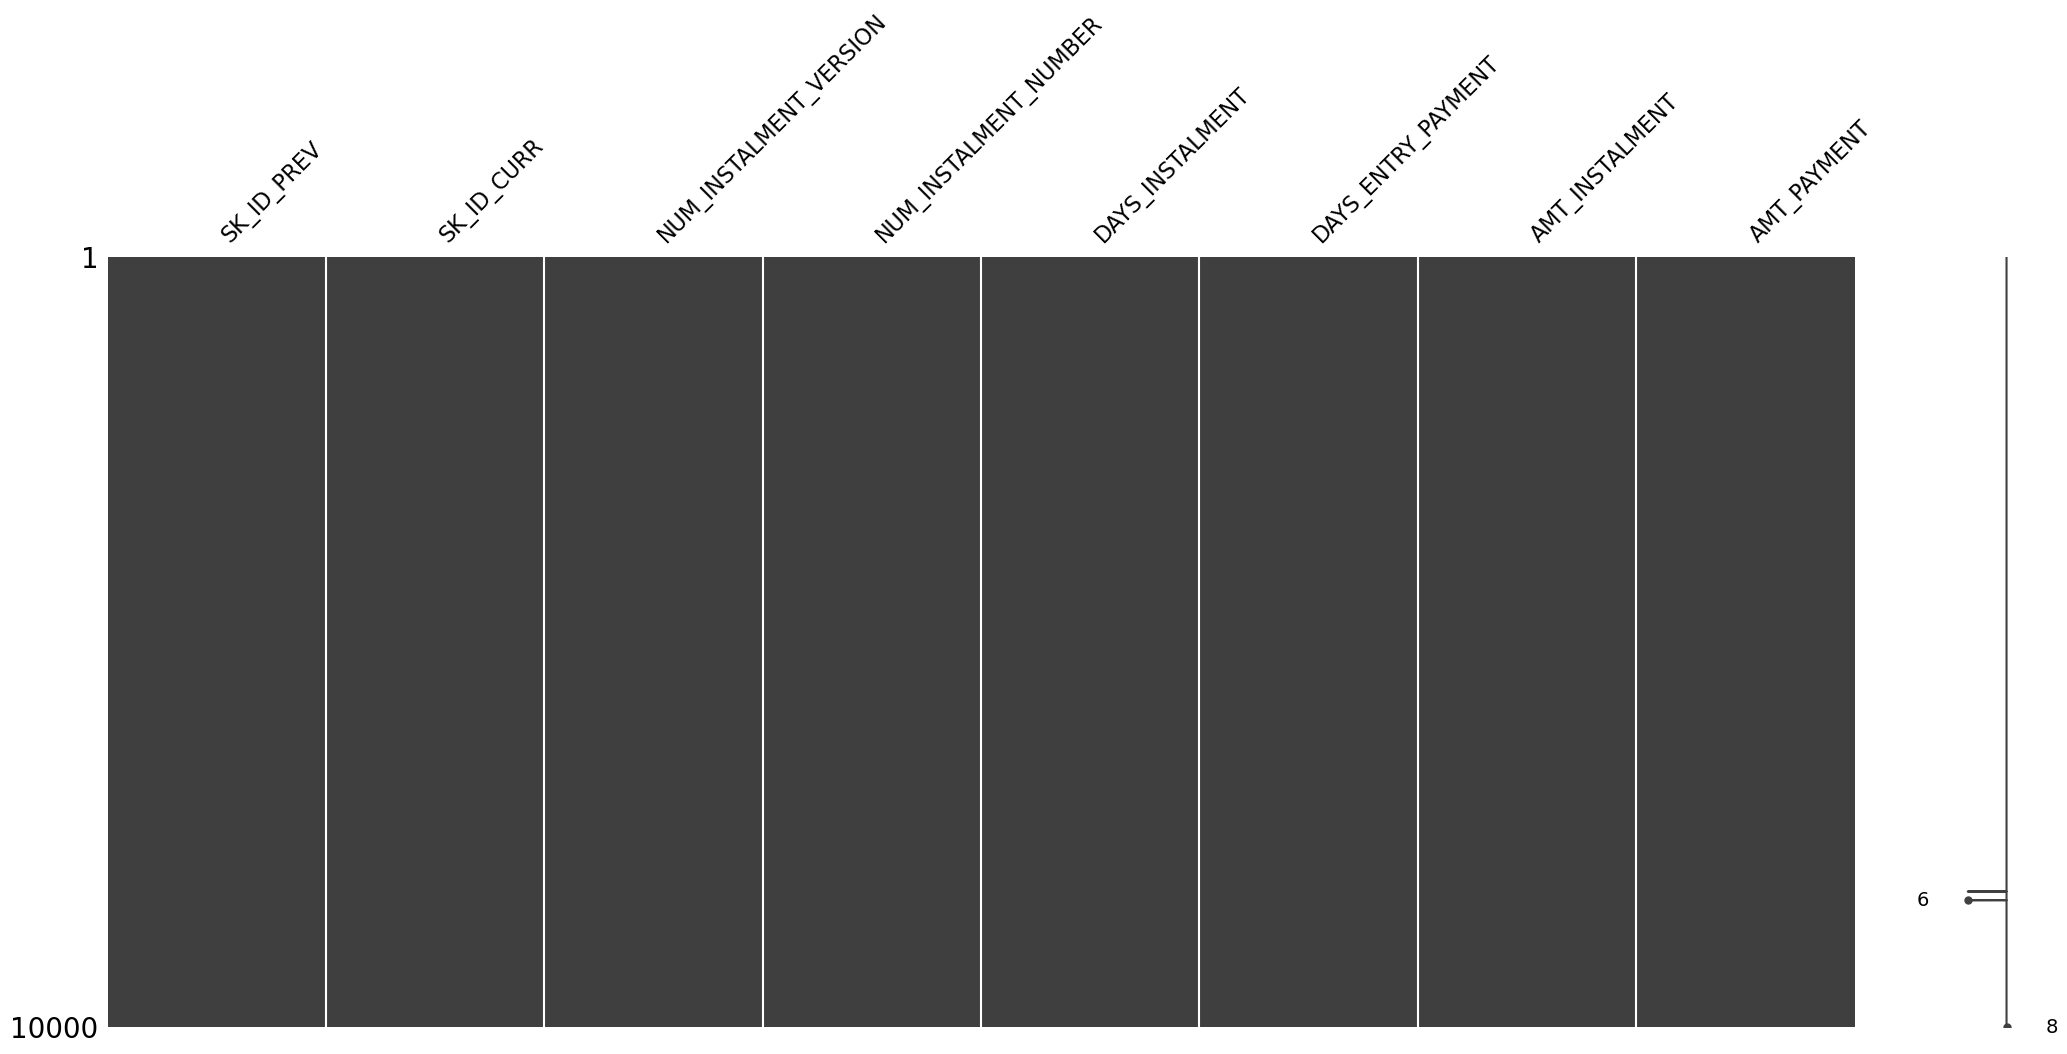

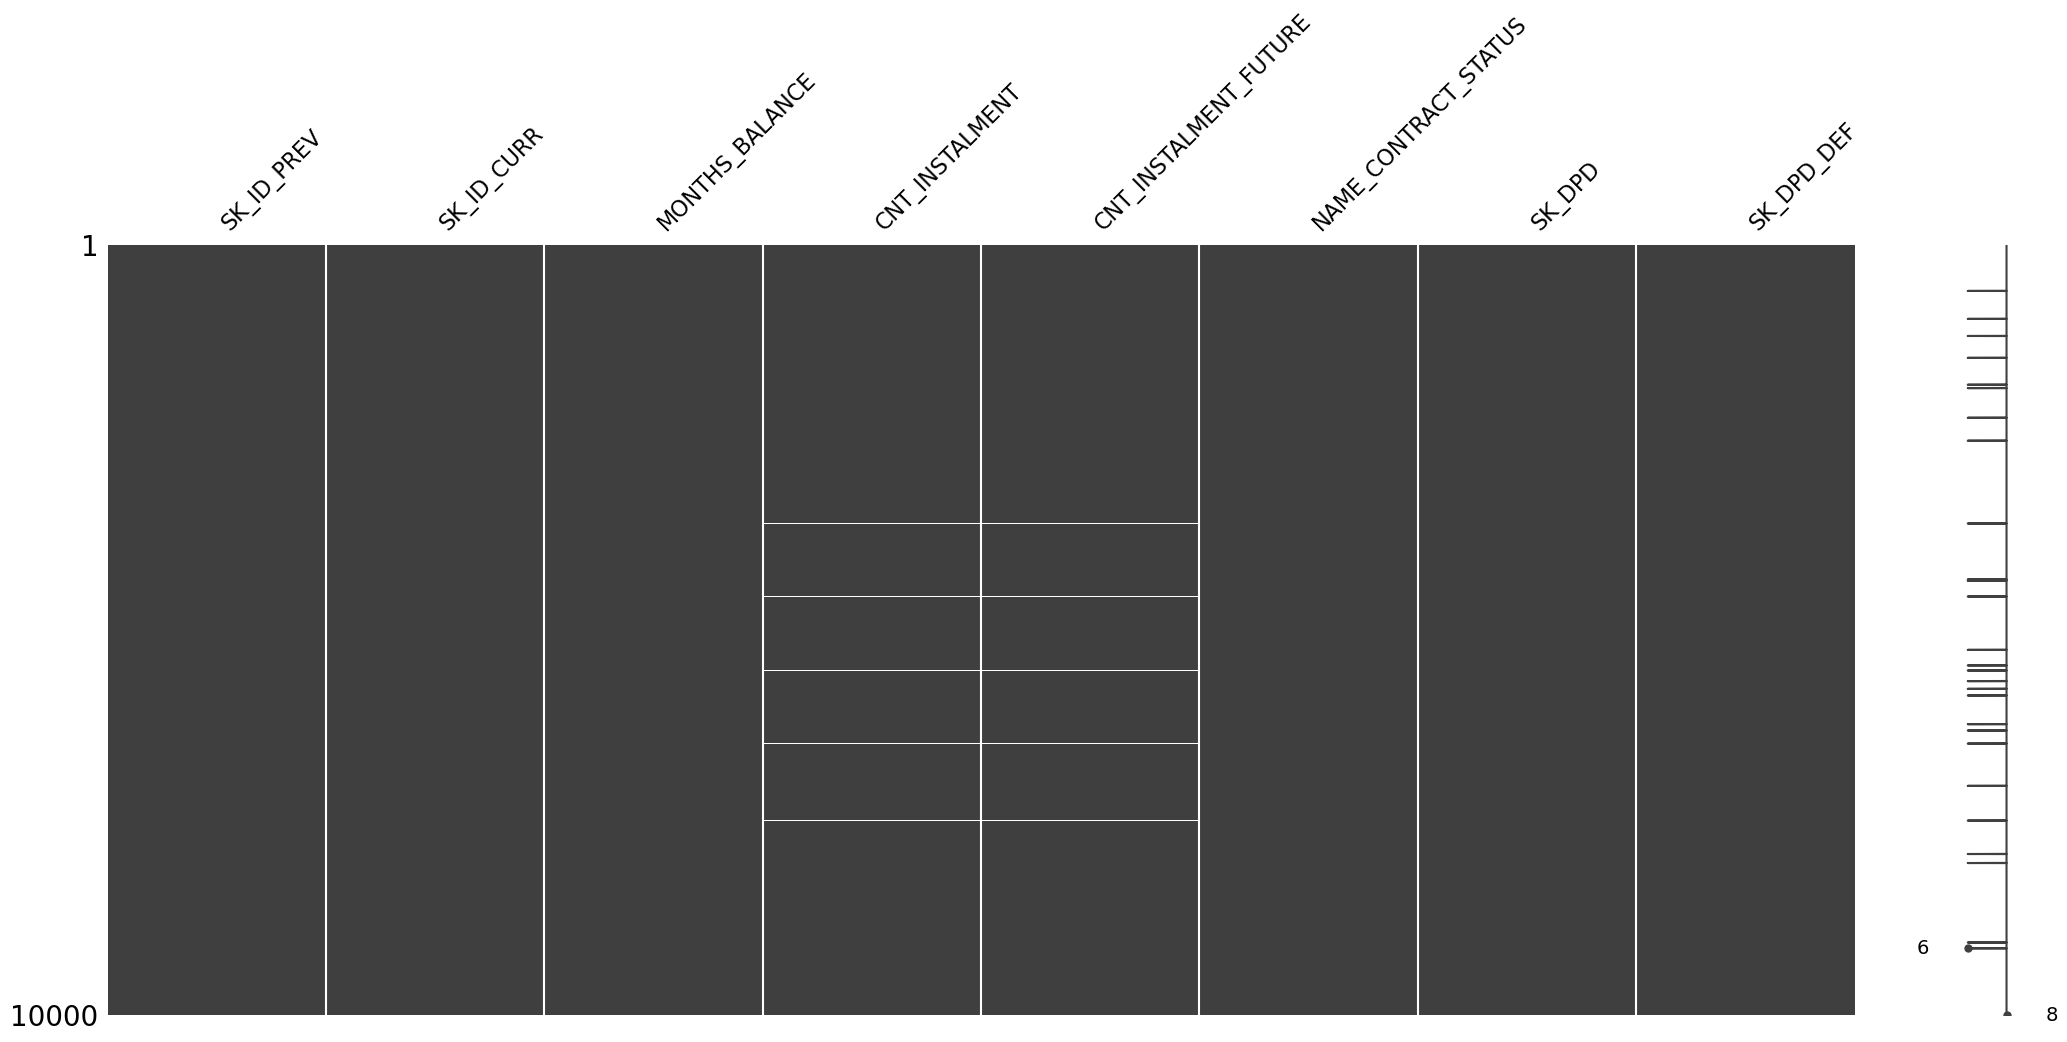

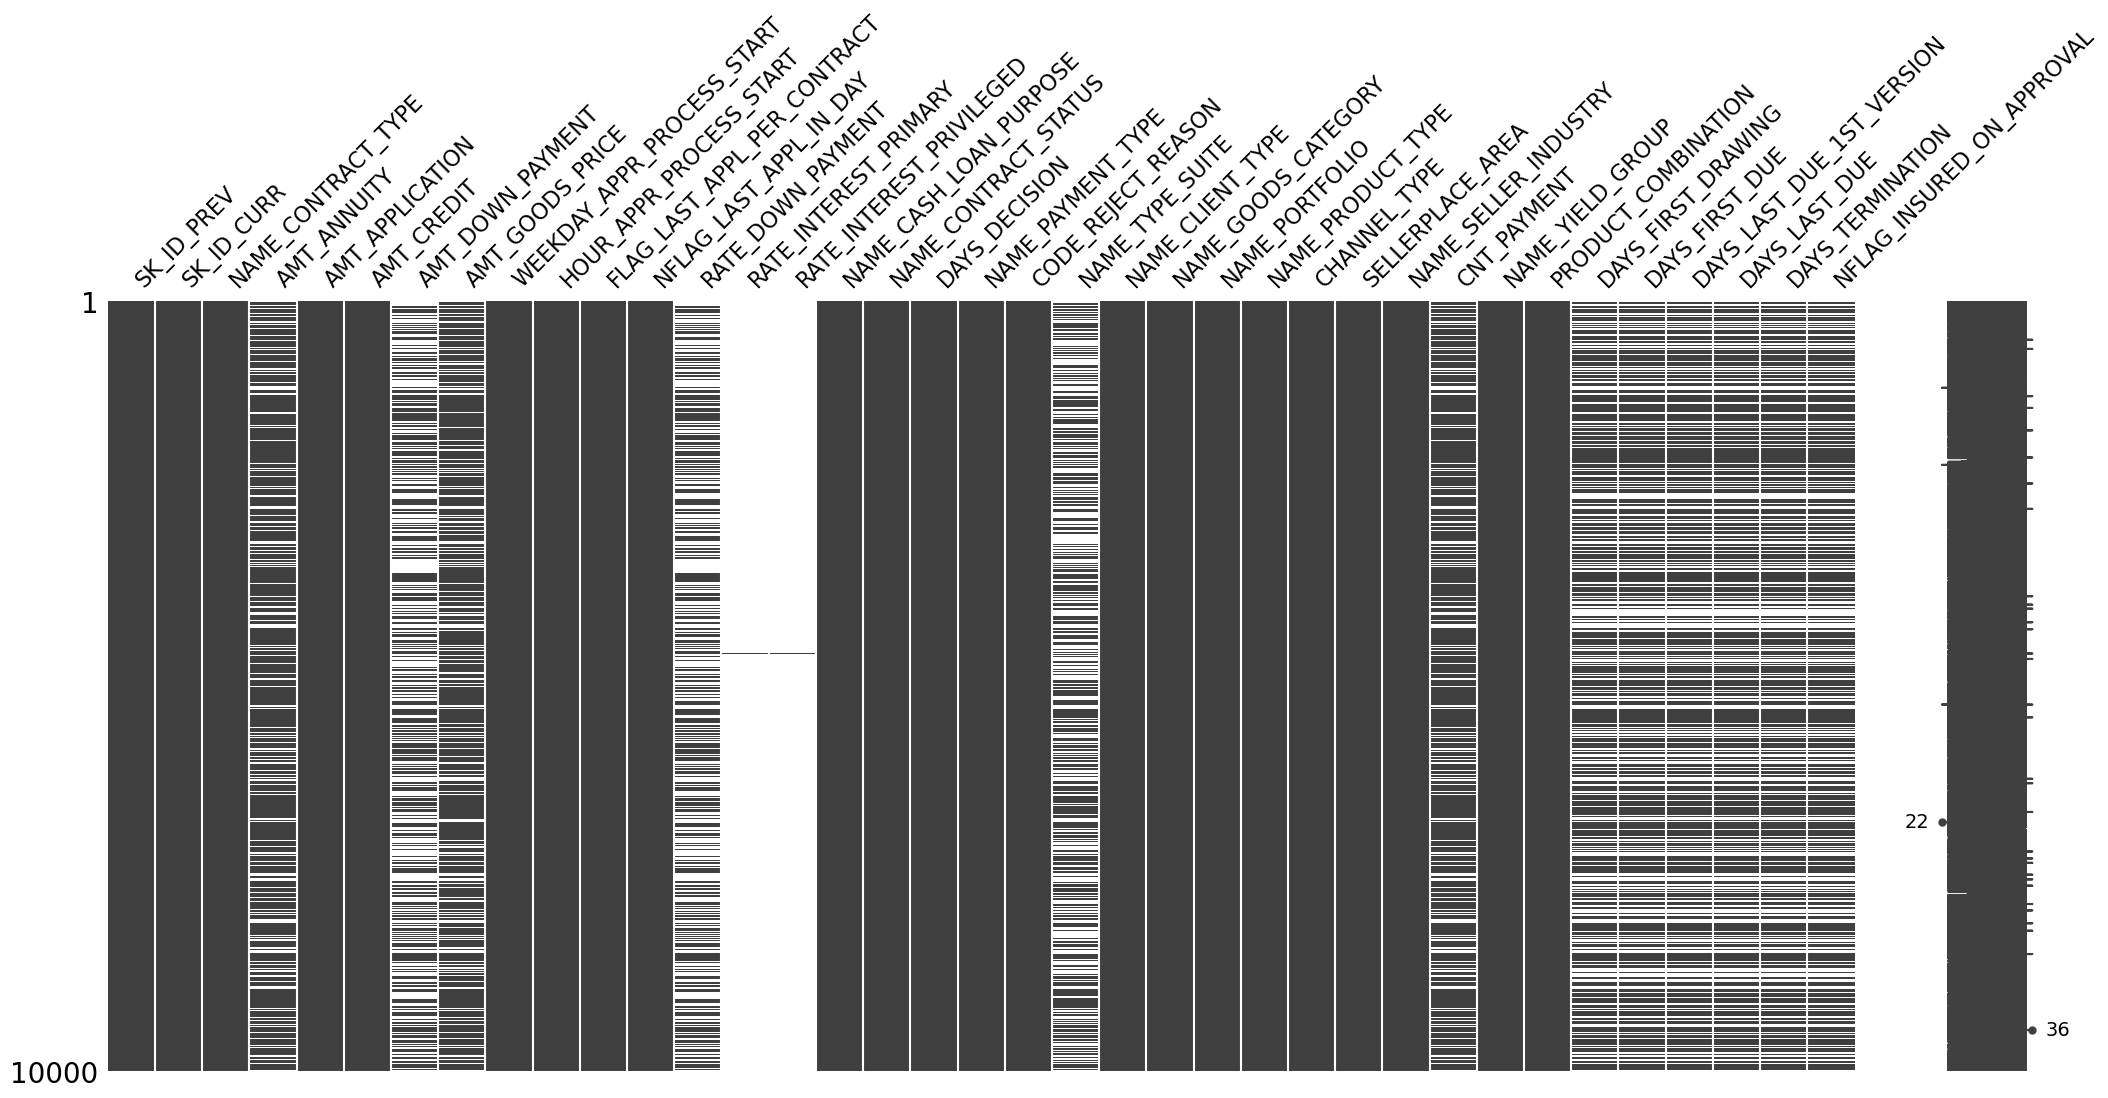

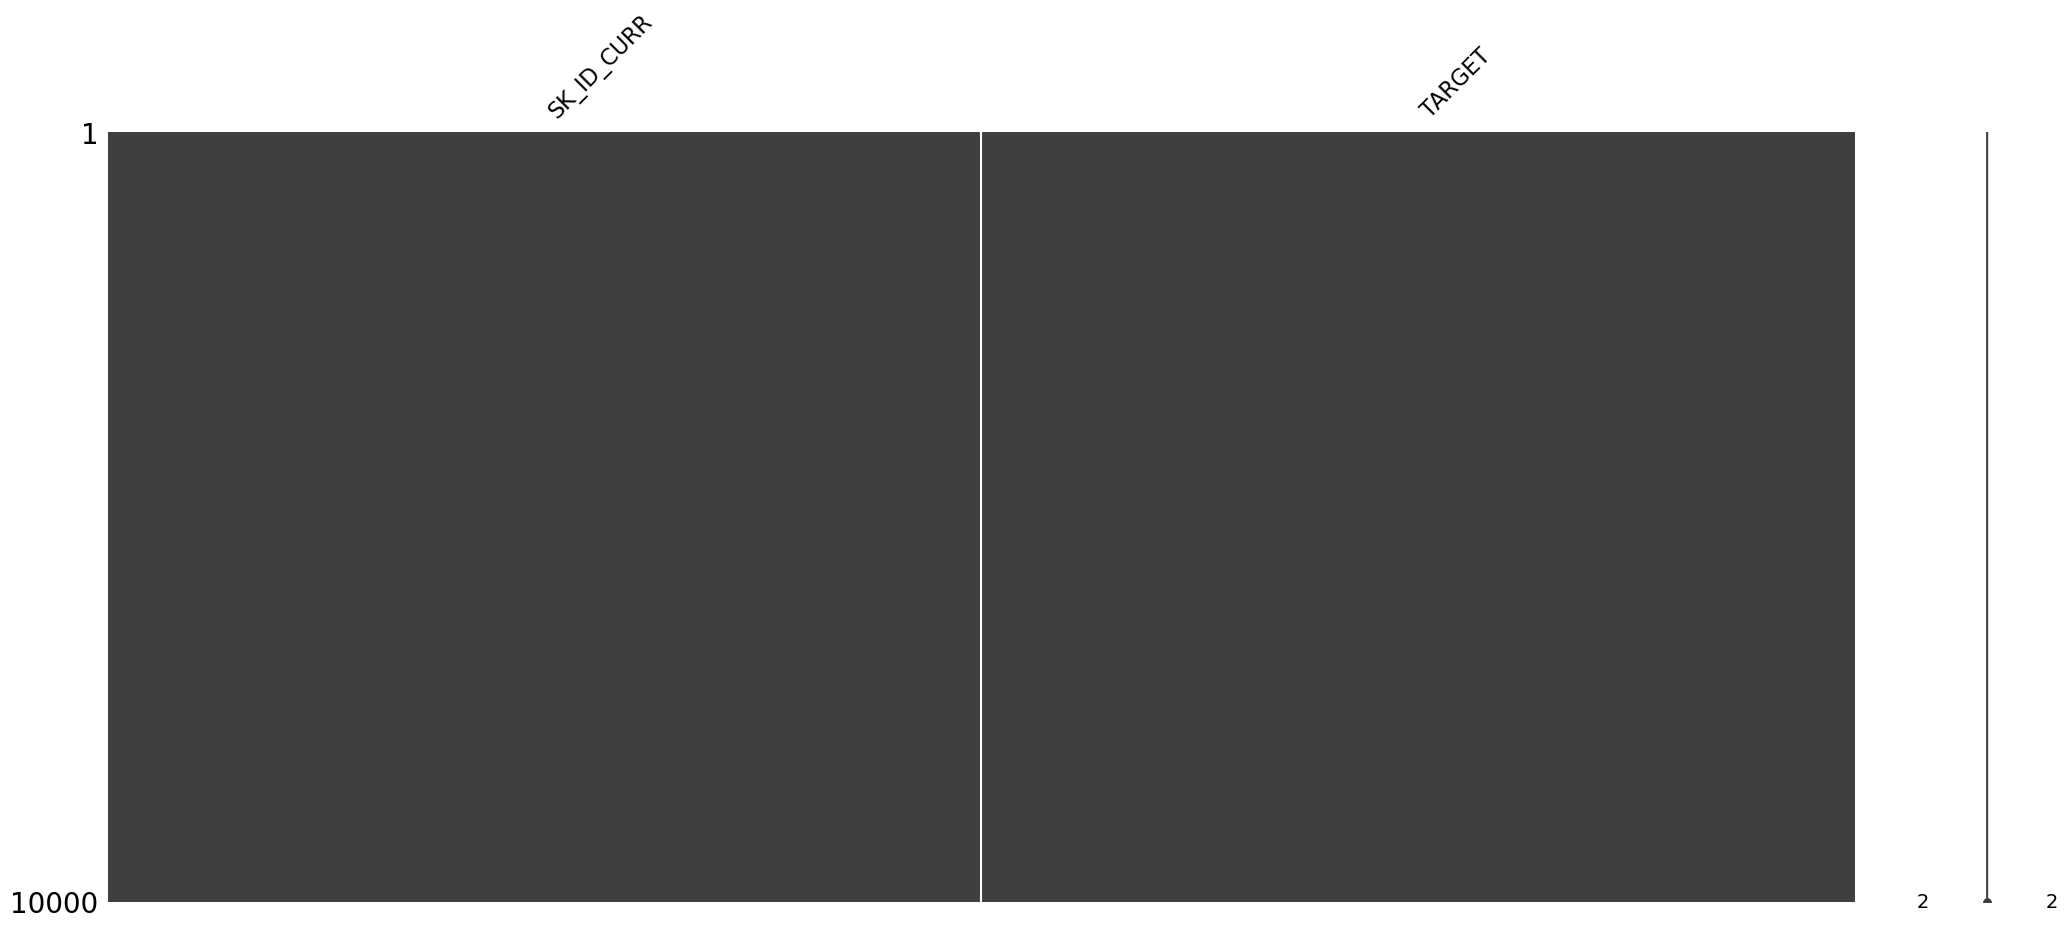

In [7]:
#Affichage des valeurs manquantes pour chaque jeu de données

for i in files:
    print(i)
    if len(locals()[i]) < 1000:
        msno.matrix(locals()[i].sample(len(locals()[i])))
    else:
        msno.matrix(locals()[i].sample(10000))

In [21]:
#Mise en place des liens entre les colonnes communes et des jeux de données initiaux

common_cols = []
data_set_1 = []
data_set_2 = []

for i in files[1:]:
    for j in files:
        tmp = locals()[i]
        tmp2 = locals()[j]
        for col1 in tmp.columns:
            if col1 in tmp2.columns:
                if ('ID' in col1) and ('PUBLISH' not in col1):
                    common_cols.append(col1)
                    data_set_1.append(i)
                    data_set_2.append(j)

In [26]:
concat_df = pd.DataFrame({'Data_Set_A' : data_set_1, 'Data_Set_B' : data_set_2, 'Common_Feature' : common_cols})
concat_df

,Data_Set_A,Data_Set_B,Common_Feature
0,application_train,application_test,SK_ID_CURR
1,application_train,application_train,SK_ID_CURR
2,application_train,bureau,SK_ID_CURR
3,application_train,credit_card_balance,SK_ID_CURR
4,application_train,installments_payments,SK_ID_CURR
...,...,...,...
71,sample_submission,credit_card_balance,SK_ID_CURR
72,sample_submission,installments_payments,SK_ID_CURR
73,sample_submission,POS_CASH_balance,SK_ID_CURR
74,sample_submission,previous_application,SK_ID_CURR


In [47]:
#Mise en place du tableau croisée dynamique

pivot_table = concat_df.pivot_table(index='Data_Set_A', columns = 'Data_Set_B', values = 'Common_Feature',
                                   aggfunc = lambda x: ', '.join(str(v) for v in x))
pivot_table = pivot_table.fillna(0).drop(['application_train'], axis = 1)
pivot_table

Data_Set_B,POS_CASH_balance,application_test,bureau,bureau_balance,credit_card_balance,installments_payments,previous_application,sample_submission
Data_Set_A,,,,,,,,
POS_CASH_balance,"SK_ID_PREV, SK_ID_CURR",SK_ID_CURR,SK_ID_CURR,0,"SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR",SK_ID_CURR
application_train,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR,0,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR
bureau,SK_ID_CURR,SK_ID_CURR,"SK_ID_CURR, SK_ID_BUREAU",SK_ID_BUREAU,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR
bureau_balance,0,0,SK_ID_BUREAU,SK_ID_BUREAU,0,0,0,0
credit_card_balance,"SK_ID_PREV, SK_ID_CURR",SK_ID_CURR,SK_ID_CURR,0,"SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR",SK_ID_CURR
installments_payments,"SK_ID_PREV, SK_ID_CURR",SK_ID_CURR,SK_ID_CURR,0,"SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR",SK_ID_CURR
previous_application,"SK_ID_PREV, SK_ID_CURR",SK_ID_CURR,SK_ID_CURR,0,"SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR","SK_ID_PREV, SK_ID_CURR",SK_ID_CURR
sample_submission,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR,0,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR,SK_ID_CURR


# 2- Fonctions du fichier *'src/FeaturesEngineering.py'*

In [80]:
#Importation des fonction de ce fichier

#Fonction permettant de One-Hot-Encoder les features qualitatives de nos jeux de données
from src.FeatureEngineering import one_hot_encoder

'''Dans toutes les fonctions suivantes, les features catégoriques sont one-hot-encoded en prenant les valeurs manquantes
comme une catégorie à part entière.'''

from src.FeatureEngineering import timer

#Fonction permettant de traiter les jeux de données application_train et applicaton_test
#Suppression des valeurs manquantes de la colonne CODE_GENDER et création de features en pourcentages 
#par exemple, le pourcentage de temps d'emploi est trouvé en divisant la colonne 'DAYS_EMPLOYED' par la colonne 'DAYS_BIRTH'
from src.FeatureEngineering import application_train_test

#Fonction peremttant de traiter les jeux de données bureau et bureau_balance contenant des features liés aux crédit
#par exemple, les features comme 'AMT_ANNUITY' indiquant la somme annuelle des annuités par personne
#Certains features sont passés à la somme, la moyenne ou encore min/max par SK_ID_CURR unique de manière à regrouper les individus
#par demande de crédit
from src.FeatureEngineering import bureau_and_balance

#Fonction traitant les données previous_application en les regroupant par 'SK_ID_CURR' et en créant de nouvell 'es colonnes
#en aggrégeant les features comme 'CNT_PAYMENT' par mean, min, max ou encore var suivant cette aggrégation
from src.FeatureEngineering import previous_applications

#Aggrégation des features comme 'MONTHS_BALANCE', 'SK_DPD' et 'SK_DPD_DEF' de plusieurs manières suivant la variable 'SK_ID_CURR'
from src.FeatureEngineering import pos_cash

#Les fonctions suivantes effectuent des transformations similaires

from src.FeatureEngineering import installments_payments
from src.FeatureEngineering import credit_card_balance

#Fonction principale appelant tour à tour les fonctions précédentes pour concatener les jeux de données en un seul
from src.FeatureEngineering import main

*NB: Les valeurs aberrantes de la variable DAYS_EMPLOYED sont égales à 365243. Elles sont aberrantes car toutes identiques égales à un an et définies positives, là où toutes les autres valeurs sont négatives. Elles sont remplacées par la valeur np.nan*

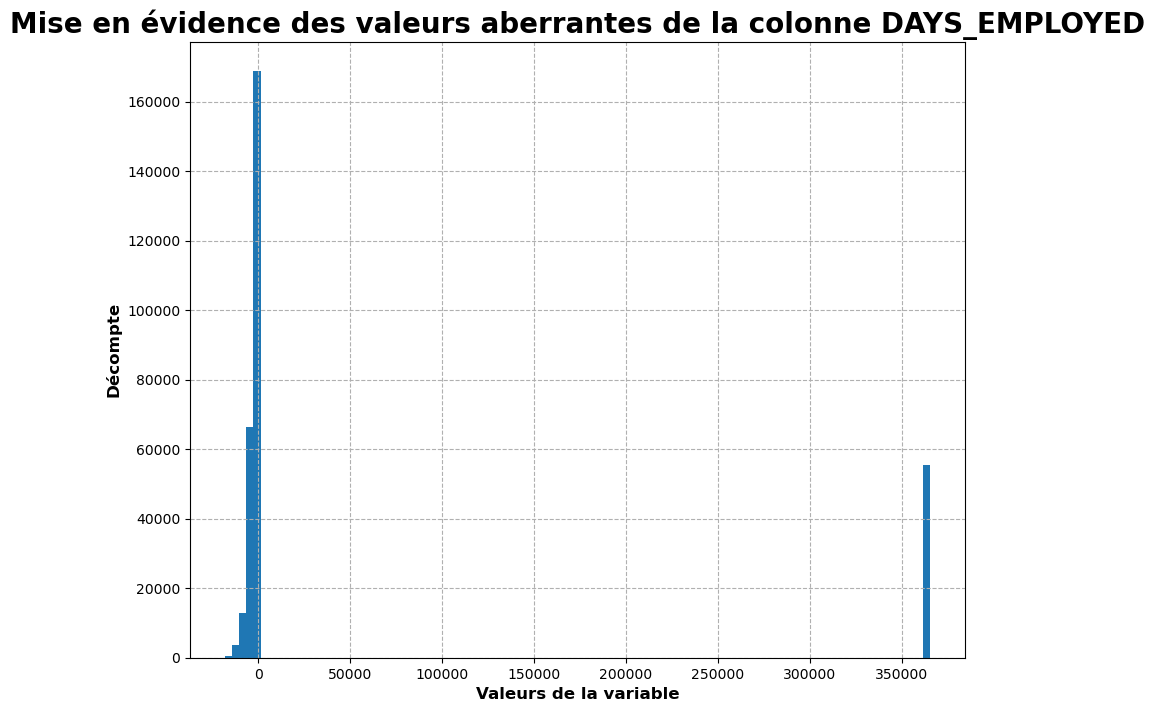

In [83]:
#Mise en avant des valeurs abéranntes de la variable DAYS_EMPLOYED

plt.figure(figsize = (10,8))
plt.title('Mise en évidence des valeurs aberrantes de la colonne DAYS_EMPLOYED', size = 20, weight = 'bold')
h = plt.hist(application_train['DAYS_EMPLOYED'].values, bins = 100)
plt.xlabel('Valeurs de la variable', size = 12, weight = 'bold')
plt.ylabel('Décompte', size = 12, weight = 'bold')
plt.grid(True, ls = '--')

## 2.1- Fonction *'application_train_test'*

In [85]:
#On se place dans le bon reprétoire

os.chdir('Notebooks')

In [86]:
#Utilisation de la fonction aplication_train_test

df = application_train_test(num_rows = None, nan_as_category = False)

Train samples: 307511, test samples: 48744


In [89]:
#Visualisation du dataframe

print("Forme du nouveau jeu de données : {}".format(df.shape))
print("Forme du jeu de données application_train: {}".format(application_train.shape))
print("Forme du jeu de données application_test: {}".format(application_test.shape))

df.sample(5)

Forme du nouveau jeu de données : (356251, 248)
Forme du jeu de données application_train: (307511, 122)
Forme du jeu de données application_test: (48744, 121)


,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
36156,36156,141873,0.0,1,1,0,0,112500.0,1260000.0,34780.5,...,1,0,0,1,0,NaN,0.089286,56250.0,0.309160,0.027604
46665,46665,154055,0.0,1,0,0,0,112500.0,199008.0,20520.0,...,0,0,0,1,0,NaN,0.565304,112500.0,0.182400,0.103111
266877,266877,409195,0.0,1,0,1,0,135000.0,675000.0,19737.0,...,0,0,0,0,0,NaN,0.200000,67500.0,0.146200,0.029240
175519,175519,303387,0.0,1,0,0,0,108000.0,266832.0,20079.0,...,0,0,0,0,0,NaN,0.404749,54000.0,0.185917,0.075250
164144,164144,290289,0.0,1,0,1,1,67500.0,263686.5,17752.5,...,0,0,0,0,0,0.142597,0.255986,22500.0,0.263000,0.067324


In [93]:
#Affichage des nouvelles colonnes

new_feats = []

for i in df.columns:
    if i in application_train.columns:
        pass
    else:
        new_feats.append(i)

print("Affichage de 15 nouvelles colonnes : \n\n{}".format(new_feats[:15]))

Affichage de 15 nouvelles colonnes : 

['index', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant']


## 2.2- Exemple supplémentaire : *'installments_payments'*

In [94]:
#Uitilisation de la fonction

ins_agg = installments_payments(num_rows = None, nan_as_category = True)

In [99]:
#Forme des jeux de données de base et nouveaux

print("Forme du nouveau jeu de données : {}".format(ins_agg.shape))

Forme du nouveau jeu de données : (339587, 26)


## 2.3- Utilisation de la fonction main permettant de concaténer le tout en un seul jeu de données unique grâce à la colonne 'SK_ID_CURR'

In [100]:
#Mise en place du jeu de données total

df = main(debug = False)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 37s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 51s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 30s
Installments payments df shape: (339587, 26)
Process installments payments - done in 62s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 54s


In [101]:
#Les valeurs manquantes de la colonne 'TARGET' correspondent au jeu de données de production

df['TARGET'].isna().mean()

0.1368248790880587

In [104]:
#Toutes les variables catégoriques sont One_Hot_Encoded, et n'ont que deux valeurs uniques

num_vars = []
cat_vars = []

for i in df.columns:
    if len(df[i].unique())<3:
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [105]:
print("Nous avons {} features qualitatives.".format(len(cat_vars)))
print("Nous avons {} features quantitatives.".format(len(num_vars)))

Nous avons 195 features qualitatives.
Nous avons 603 features quantitatives.
